# KR PREDICTIONS

In [1]:
file_path = "datasets/kr_ticker-sentiment_smLag3.csv"

window_size = 10
lstm_units = [100, 100]
dense_units = [50]
dropout = 0

epochs = 50
batch_size = 8
set_early_stopping = True

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0581 - val_loss: 0.0067
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030 - val_loss: 0.0044
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

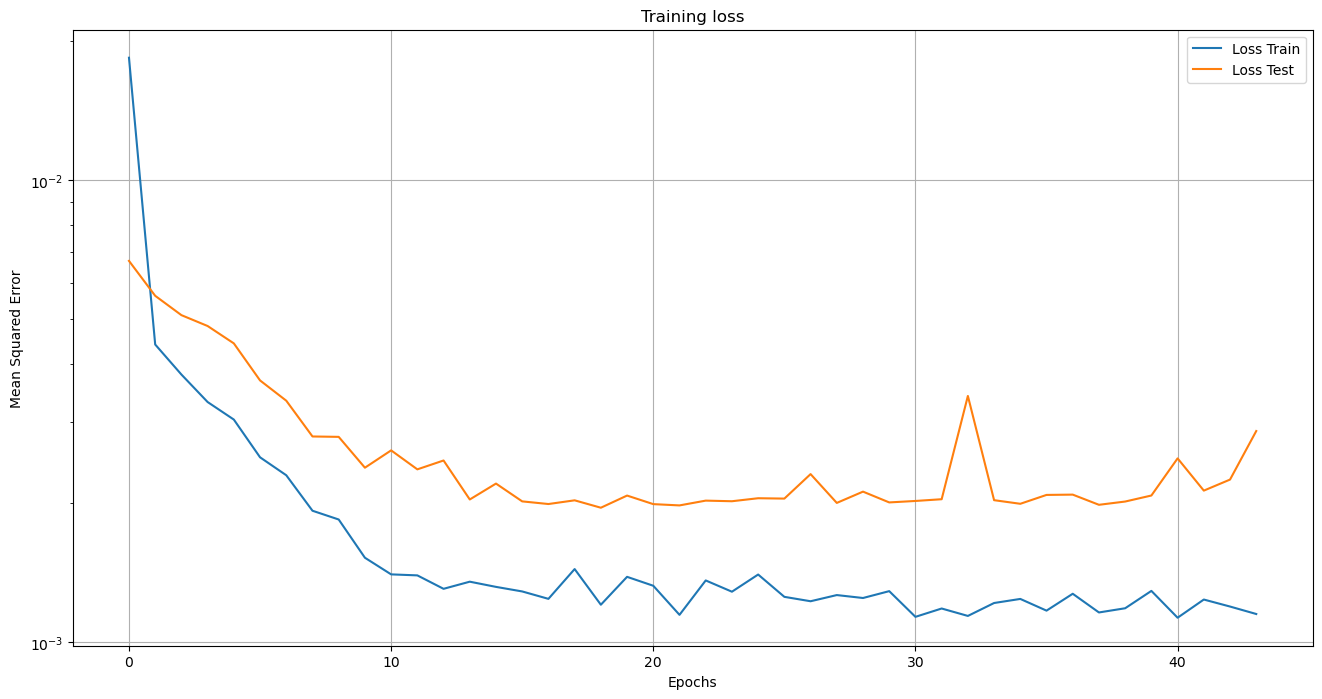

Train-Set Score
MAE: 0.7812
RMSE: 1.1274
MAPE (%): 3.8729
R²: 0.9809

Test-Set Score
MAE: 0.3532
RMSE: 0.5238
MAPE (%): 1.4460
R²: 0.9673


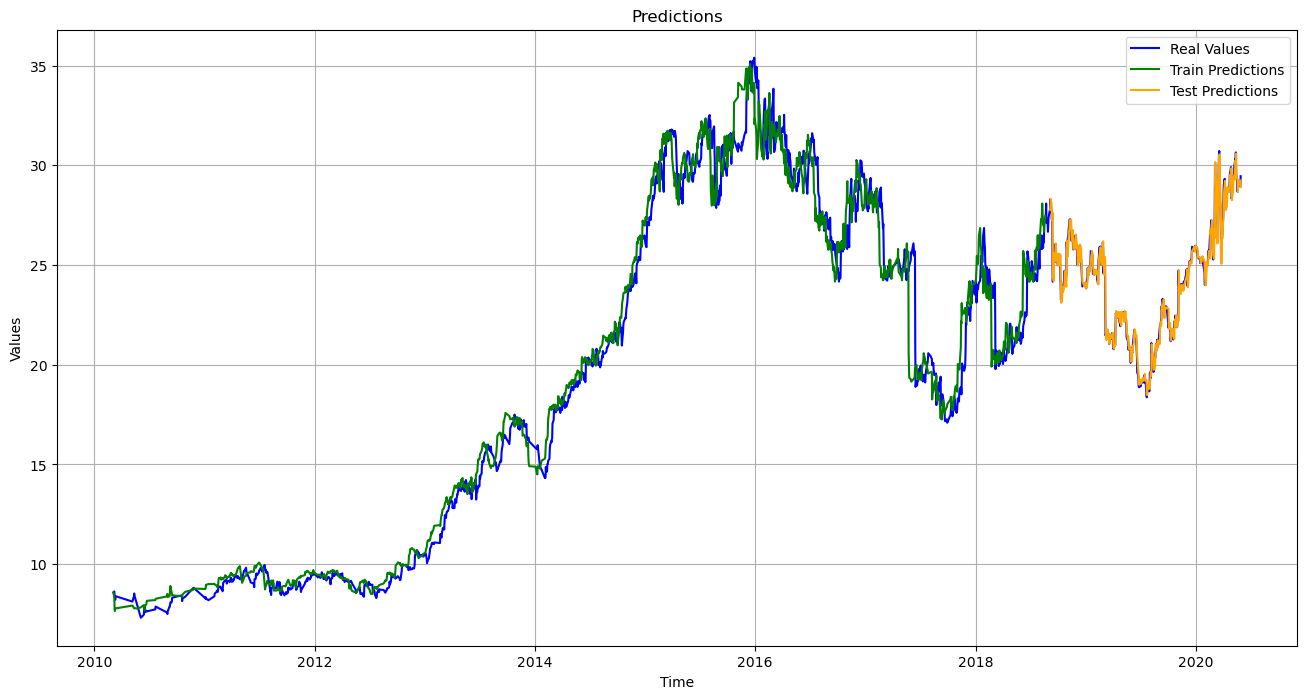

In [2]:
# Imports
import pandas as pd
import numpy as np
import ml_utils as mlu
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset
df = pd.read_csv(file_path)
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

# Selecting Features
df = df.dropna()
target = df[['Close']]
input = df[['Close']]

# Preparing Data
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()
X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input,
                                                                                            scaled_target,
                                                                                            window_size=window_size,
                                                                                            train_size_pct=0.8)

# Creating Model
model2 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=lstm_units,
                       dense_units=dense_units,
                       dropout=dropout)

# Training Model
model2.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    set_early_stopping=set_early_stopping,
    validation_data=(X_test, y_test)
)

# Making Predictions
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Printing Results
model2.plot_loss()
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=window_size)
data_scaler.print_scores()
data_scaler.plot_results()

# FORECASTS TESTS

In [52]:
def forecast_autoregressive(model, initial_window, n_steps):
    window = initial_window
    predictions = []

    for _ in range(n_steps):
        next_pred = model.predict([window])[0] #Single prediction
        predictions.append(next_pred)
        
        window = window[1:]
        window = np.append(window, np.array([next_pred])).reshape(window.shape[0]+1, window.shape[1])

    return np.array(predictions)

In [59]:
test_results = data_scaler.test_results
train_results = data_scaler.train_results
test_results['forecast'] = pd.NA
forecast_window = 350
test_results

,Close,pred,forecast
date,,,
2018-09-05,27.778341,27.765722,NaN
2018-09-06,28.299843,27.776106,NaN
2018-09-07,28.134697,28.307333,NaN
2018-09-10,27.595819,28.082218,NaN
2018-09-11,27.282919,27.525850,NaN
...,...,...,...
2020-05-20,29.162302,28.663589,NaN
2020-05-21,28.999790,29.238586,NaN
2020-05-22,29.225506,29.000454,NaN


In [ ]:
initial_window = scaled_target[len(train_results):len(train_results)+10]

10

In [64]:
forecasts = forecast_autoregressive(model2, initial_window, forecast_window)
forecasts

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

array([[ 0.4036491 ],
       [ 0.43067232],
       [ 0.4712562 ],
       [ 0.39227983],
       [ 0.3915696 ],
       [ 0.3858874 ],
       [ 0.355371  ],
       [ 0.38091654],
       [ 0.41360188],
       [ 0.4420585 ],
       [ 0.3819901 ],
       [ 0.40814948],
       [ 0.44748756],
       [ 0.3709937 ],
       [ 0.37030694],
       [ 0.36481336],
       [ 0.3353342 ],
       [ 0.36000857],
       [ 0.391621  ],
       [ 0.41918027],
       [ 0.36104617],
       [ 0.38634443],
       [ 0.42444152],
       [ 0.35042062],
       [ 0.34975716],
       [ 0.34445107],
       [ 0.31605065],
       [ 0.33981138],
       [ 0.37035662],
       [ 0.39702106],
       [ 0.34081328],
       [ 0.36525518],
       [ 0.4021152 ],
       [ 0.33055624],
       [ 0.3299159 ],
       [ 0.32480836],
       [ 0.29754665],
       [ 0.32035094],
       [ 0.34980518],
       [ 0.37557876],
       [ 0.3213134 ],
       [ 0.34487784],
       [ 0.3805062 ],
       [ 0.31146327],
       [ 0.31084868],
       [ 0

In [80]:
forecasts = data_scaler.inverse_scale_output(forecasts)
test_results['forecast'].iloc[:forecast_window] = forecasts.reshape(forecast_window,)

In [81]:
test_results

,Close,pred,forecast
date,,,
2018-09-05,27.778341,27.765722,26.991854
2018-09-06,28.299843,27.776106,27.311872
2018-09-07,28.134697,28.307333,27.79248
2018-09-10,27.595819,28.082218,26.857216
2018-09-11,27.282919,27.525850,26.848804
...,...,...,...
2020-05-20,29.162302,28.663589,NaN
2020-05-21,28.999790,29.238586,NaN
2020-05-22,29.225506,29.000454,NaN


In [87]:
mlu.model_scores(y_true=test_results['Close'].iloc[:50],
                 y_pred=test_results['forecast'].iloc[:50])

MAE: 1.4490
RMSE: 1.6518
MAPE (%): 5.8077
R²: -0.5860


{'MAE': 1.4490118789672852,
 'RMSE': 1.6518028178303932,
 'MAPE (%)': 5.807666482217652,
 'R²': -0.5859684909583702}

In [91]:
test_results['forecast'].notna()

date
2018-09-05     True
2018-09-06     True
2018-09-07     True
2018-09-10     True
2018-09-11     True
              ...  
2020-05-20    False
2020-05-21    False
2020-05-22    False
2020-05-28    False
2020-05-29    False
Name: forecast, Length: 400, dtype: bool

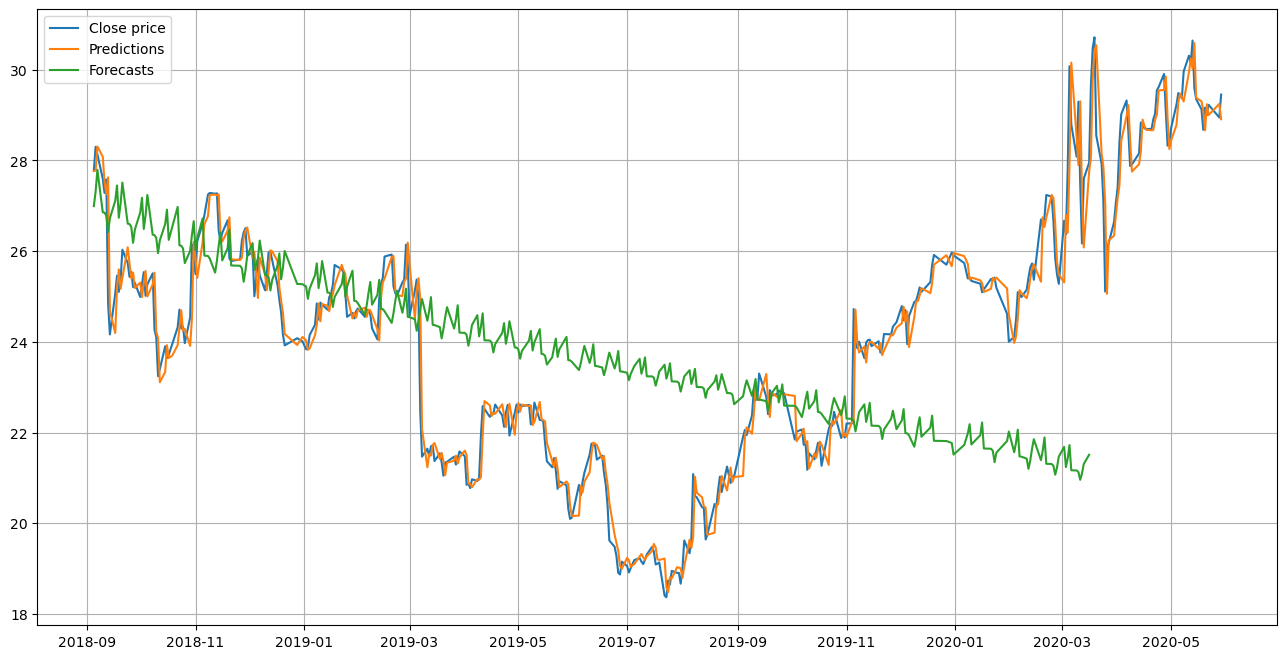

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(test_results['Close'], label='Close price')
plt.plot(test_results['pred'], label='Predictions')
plt.plot(test_results['forecast'][test_results['forecast'].notna()], label='Forecasts')
plt.grid(True)
plt.legend()
plt.show()